# **Imágenes astronómicas**

## Imágenes FITS

FITS (Flexible Image Transport System) es el formato de archivo más utilizado en astronomía. Es posible almacenar información tanto de imagen directa como de espectros, se pueden guardar también conteos de fotones, cubos de datos, etc. Una de sus características es que este formato admite una cabecera (o header) en formato ASCII, que puede contener la información necesaria para la reducción de la imagen. Esto hace referencia a la hora y lugar de observación, el filtro utilizado, las características técnicas del CCD, condiciones climáticas al momento de la observación, etc.

## Cabeceras (o headers) de las imágenes FITS

Cómo ver el header de una imagen en el entorno python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import ImageNormalize, ZScaleInterval, LinearStretch

In [2]:
ls   # podemos ver qué archivos tenemos en el directorio, igual que con linux:

es_todo_por_hoy.jpg      LINKS.md    Tutorial_FITS.ipynb
HD5980.fits              manuales/   Tutorial_notebook.ipynb
investigadores-2007.csv  n3294.fits  Tutorial_notebook.zip
investigadores-2019.csv  README.md


In [3]:
imagen = 'HD5980.fits'
with fits.open(imagen) as hdul:
    hdul.info()
    hdr = hdul[0].header  # defino hdr como la variable con el contenido del header
    data = hdul[0].data   # defino data con el contenido de la imagen

Filename: HD5980.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (1199, 1199)   float32   


In [4]:
hdr  # para "ver" una variable simplemente tipeo su nombre

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 1199 / Axis length                                    
NAXIS2  =                 1199 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2016-08-28T19:12:33' / Date FITS file was generated                  
IRAF-TLM= '2016-08-28T19:12:33' / Time of last modification                     
CHIP    = 'SITe3'                                  / DETECTOR NAME              
TEL     = 'LCO-40'                                 / TELESCOPE NAME             
OBJECT  = 'HD5980  '           / OBJECT NAME                                    
COMMENT = ''                

In [5]:
# si quero obtener el valor de un determinado keyword
hdr['JD']

2456306.56568299

In [6]:
# si quiero obtener los valores de varios keyword usando comodín
hdr['*JD']

JD      =     2456306.56568299 / JD a media observacion. CSP Keyword.           
HJD     =      2456306.5634122                                                  
LJD     =             2456306.                                                  

#### Ejercicio 1: Obtenga los valores de las coordenadas celestes a donde apuntó el telescopio, el tiempo de exposición, el filtro utilizado y la masa de aire.

In [7]:
#escriba aquí


#### Ejercicio 1 bis: Determine el tiempo de exposición en minutos.

In [8]:
#escriba aquí

exp_min = hdr['EXPTIME']/60.0
print (exp_min, round(exp_min,5))

0.050499999999999996 0.0505


## Visualización de la imagen fits

Dijimos que la imagen fits consta de un header y de la imagen propiamente dicha. Ya vimos qué información puede contener el header, ahora vamos a ver la imagen.

Para jugar un poco con esto vamos a utilizar otra imagen.

In [9]:
imagen = 'n3294.fits'
with fits.open(imagen) as hdul:
    hdr2 = hdul[0].header  
    data2 = hdul[0].data   
data2 # La imagen está almacenada en la variable "data2", puedo verla simplemente tipeando   

array([[1063, 1044, 1044, ..., 1087, 1077, 1098],
       [1075, 1056, 1057, ..., 1075, 1069, 1086],
       [1083, 1060, 1061, ..., 1063, 1065, 1093],
       ...,
       [1091, 1066, 1068, ..., 1066, 1073, 1088],
       [1086, 1071, 1071, ..., 1068, 1069, 1091],
       [1076, 1055, 1062, ..., 1064, 1058, 1077]], dtype=int32)

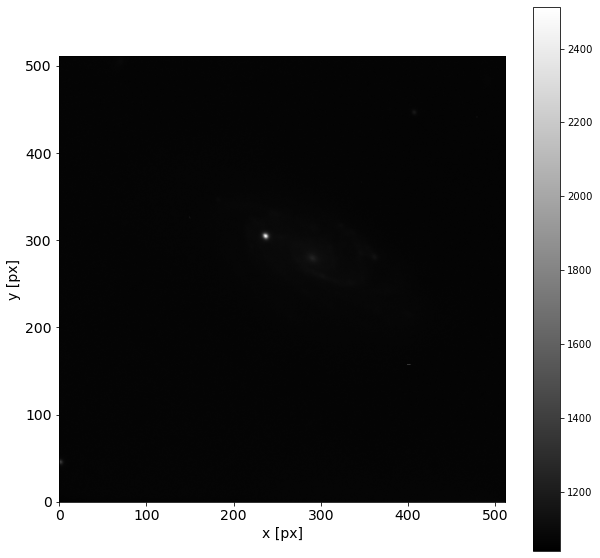

In [10]:
# forma simple de graficar "visualizar" la imagen
fig, ax = plt.subplots(figsize=(10,10))
img = ax.imshow(data2, origin='lower', cmap='gray')
ax.set_xlabel('x [px]', fontsize=14)
ax.set_ylabel('y [px]', fontsize=14)
ax.tick_params(labelsize=14)
plt.colorbar(img)
plt.show()

Apenas si podemos ver lo que nos interesa. 

Cuando desplegamos la imagen, podríamos llegar a pensar que estamos viendo todos los datos, pero no siempre es el caso. Es importante entender qué es lo que estamos haciendo al desplegar una imagen, y cuáles son sus limitaciones. El rango de despliegue está determinado por los parámetros z1 y z2. Pensemos a la imagen como una matriz de números, y cada uno representa el brillo en ese píxel. El rango del despliegue, configurado a través de z1 y z2 , representan los valores mínimos y máximos que se muestran. Si se asigna el color negro para los valores bajos y el color blanco para los valores altos, entonces z1 corresponde a negro y z2 corresponde a blanco. Todo lo que sea más débil que z1 será negro, y todo píxel más brillante que z2 será blanco. Los que tengan valores intermedios de brillo, tendrán alguna tonalidad de gris. Es importante elegir bien los valores de z1 y z2 ya que por ejemplo, si hay detalles en la imagen con brillo por encima de z2 , no se verá en el despliegue elegido, hasta que se ajusten los valores de z1 y de z2 . Se puede ver una idea de cómo funcionan z1 y z2 en esta Figura:

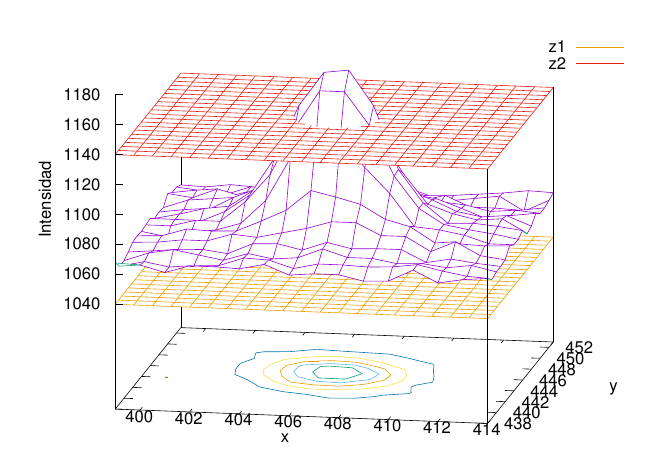


**Estadística de la imagen**

El python ya trae una serie de funciones que me pueden ser útiles.

In [11]:
# Defino variables de interés:
data_min = data2.min()
data_max = data2.max()
data_mean = data2.mean()
data_std = data2.std()
print(data_min, data_max, data_mean, data_std)

1041 2512 1070.258056640625 12.684967387224766


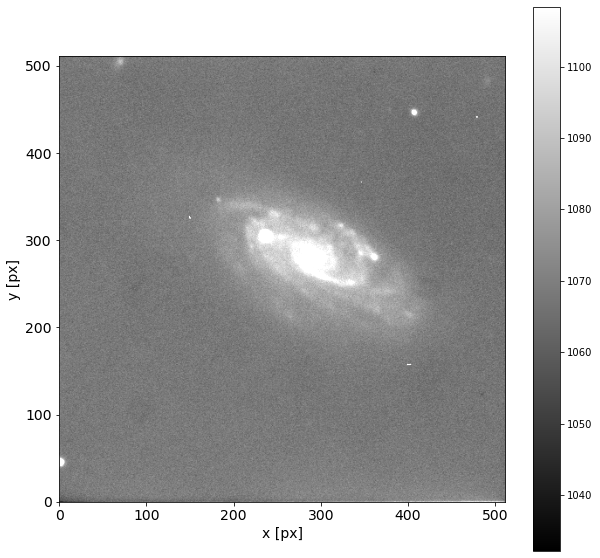

In [12]:
# vuelvo a plotear, pero ahora le indico entre qué valores z1 (=vmin) y z2 (=vmax) quiero "ver"
fig, ax = plt.subplots(figsize=(10,10))
img = ax.imshow(data2, origin='lower',  vmin=data_mean-3*data_std, vmax=data_mean+3*data_std, cmap='gray')
ax.set_xlabel('x [px]', fontsize=14)
ax.set_ylabel('y [px]', fontsize=14)
ax.tick_params(labelsize=14)
plt.colorbar(img)
plt.show()

#### Ejercicio 2. Vuelva a plotear la imagen con otros vmin y vmax. Busque en internet qué valores puede tomar la variable "cmap". Puede identificar la SN? 

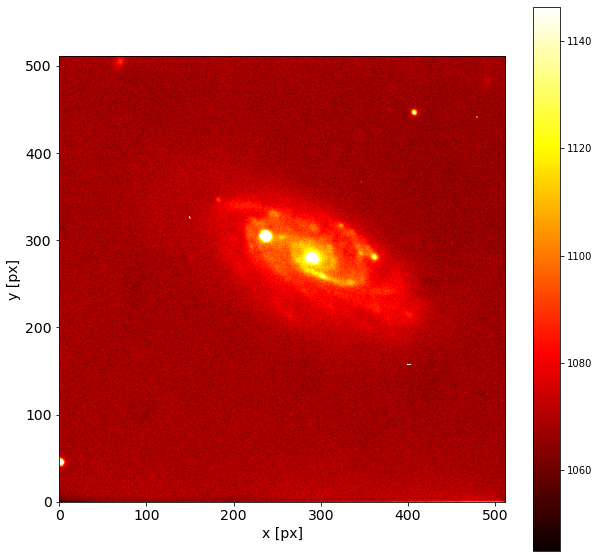

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
img = ax.imshow(data2, origin='lower',  vmin=data_mean-2*data_std, vmax=data_mean+6*data_std, cmap='hot')
ax.set_xlabel('x [px]', fontsize=14)
ax.set_ylabel('y [px]', fontsize=14)
ax.tick_params(labelsize=14)
plt.colorbar(img)
plt.show()

## Usando ds9 para analizar la imagen

Vamos a volver a utilizar la imagen HD5980.fits 

In [14]:
# Abrir el ds9, desde la terminal de CONDA.
# ejemplo: $ ds9 -title "practica00" &
import imexam
import os
os.environ['$XPA_METHOD'] = "local" # para conectarlo a ds9

windows = imexam.list_active_ds9()

if windows:
    a = imexam.connect(windows.popitem()[0])
else:
    print ('No encuentro el DS9 abierto.')


No active sessions registered
No encuentro el DS9 abierto.


In [15]:
a.load_fits('HD5980.fits')
a.scale()

NameError: name 'a' is not defined

In [16]:
a.cmap(color='grey') #['grey', 'red', 'green', 'red', 'blue', 'a', 'b', 'bb', 'he', 'i8', 'aips0', 'sls', 'hsv', 'heat', 'cool', 'rainbow', 'standard', 'staircase', 'color']
a.scale('linear')    # [linear|log|pow|sqrt|squared|asinh|sinh|histequ]

#### Ejercicio 3. 

La tarea imexamine nos provee de algunas herramientas de diagnóstico rápido. Una vez ejecutado el comando sin argumento, se verá que el cursor es redondo y parpadea sobre la imagen. Pulsando distintas letras (sobre la imagen) se pueden hacer una gran variedad de tareas:

1. Calcular el cielo promedio de la imagen.
2. Calcular el FWHM promedio de las estrellas
3. Calcular la elipticidad de las estrellas.
4. Desplegar el perfil radial de las estrellas.

Responda:

¿Por qué las estrellas más brillantes se ven más grandes en la imagen?¿El FWHM es el mismo para todas las estrellas? ¿Por qué? ¿Qué caracteriza el FWHM de las estrellas?¿De qué depende el FWHM?


Press 'q' to quit

2 Make the next plot in a new window
a Aperture sum, with radius region_size 
b Return the 2D gauss fit center of the object
c Return column plot
d Return the Center of Mass fit center of the object
e Return a contour plot in a region around the cursor
g Return curve of growth plot
h Return a histogram in the region around the cursor
j 1D [Gaussian1D default] line fit 
k 1D [Gaussian1D default] column fit
l Return line plot
m Square region stats, in [region_size],default is median
r Return the radial profile plot
s Save current figure to disk as [plot_name]
t Make a fits image cutout using pointer location
w Display a surface plot around the cursor location
x Return x,y,value of pixel
y Return x,y,value of pixel
Current image /home/juanpablo/materias/Astronomia_Estelar/practica00/HD5980.fits
xc=404.4249	yc=619.0979
Background per pixel: 3.365406751761674
Max. pix. flux =  2570.945
amp =  3005.932
fwhm =     3.609


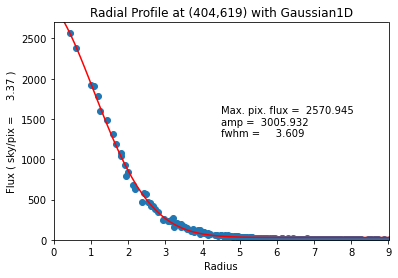

[595:600,372:377] median: 1.3010594844818115
[543:548,359:364] median: 0.9755935668945312
[481:486,325:330] median: 3.215764284133911
[494:499,318:323] median: 2.1814322471618652


In [17]:
a.imexam()